In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

## setting up data

In [3]:
indepld = pd.read_csv('../data/window_indep_ldprune.csv')
indepld.head()

,window_size,pairwise_r2,num_snps,pearson_corr,phenotype
0,50,0.5,211505,0.373289,phenotype2
1,50,0.5,211675,0.422237,phenotype2
2,50,0.5,211470,0.381061,phenotype2
3,50,0.5,211866,0.389467,phenotype2
4,50,0.5,211672,0.415936,phenotype2


In [5]:
indeptimes = pd.read_csv('../data/old/window_indep_ldprune_times.csv')
indeptimes.head()

,window_size,pairwise_r2,num_snps,overall_runtime,data_setup_runtime,model_runtime,phenotype
0,50,0.5,211505,145.901304,64.685441,81.215461,phenotype2
1,50,0.5,211675,125.306394,46.230055,79.076145,phenotype2
2,50,0.5,211470,116.764110,45.408459,71.355451,phenotype2
3,50,0.5,211866,116.551084,45.435705,71.115184,phenotype2
4,50,0.5,211672,132.832920,61.616480,71.216238,phenotype2


In [6]:
ldprune = pd.read_csv('../data/old/windowall.csv')
ldprune['prune_method'] = 'ldprune'
ldprune.rename(columns={'outr2s': 'pairwise_r2', 'outrs': 'pearson_corr', 'outphenos': 'phenotype', 'outwindows': 'window_size'}, inplace=True)
ldprune

,pairwise_r2,window_size,phenotype,pearson_corr,prune_method
0,0.5000,50,phenotype1,0.298652,ldprune
1,0.5000,50,phenotype1,0.284320,ldprune
2,0.5000,50,phenotype1,0.278172,ldprune
3,0.5000,50,phenotype1,0.287409,ldprune
4,0.5000,50,phenotype1,0.349859,ldprune
...,...,...,...,...,...
5995,0.9999,100000,phenotype8,0.216131,ldprune
5996,0.9999,100000,phenotype8,0.259657,ldprune
5997,0.9999,100000,phenotype8,0.253982,ldprune
5998,0.9999,100000,phenotype8,0.274422,ldprune


In [8]:
ldprune = pd.read_csv('../data/old/window50.csv')
ldprune.head()

,pairwise_r2,window_size,phenotype,pearson_corr,prune_method
0,0.5,50,phenotype1,0.305837,ldprune
1,0.5,50,phenotype1,0.274288,ldprune
2,0.5,50,phenotype1,0.298174,ldprune
3,0.5,50,phenotype1,0.308124,ldprune
4,0.5,50,phenotype1,0.333539,ldprune


In [13]:
random = pd.read_csv('../data/old/windowrandom.csv')
random["prune_method"] = "random"

In [14]:
random.rename(columns={'outr2s': 'pairwise_r2', 'outrs': 'pearson_corr', 'outphenos': 'phenotype', 'outwindows': 'window_size'}, inplace=True)
df = pd.concat([ldprune, random])
df.head()

,pairwise_r2,window_size,phenotype,pearson_corr,prune_method
0,0.5,50,phenotype1,0.305837,ldprune
1,0.5,50,phenotype1,0.274288,ldprune
2,0.5,50,phenotype1,0.298174,ldprune
3,0.5,50,phenotype1,0.308124,ldprune
4,0.5,50,phenotype1,0.333539,ldprune


In [29]:
snp_size = pd.read_csv('../data/old/snp_size_window.csv')
# df['num_snps'] = df.apply(lambda row: snp_size[(snp_size.r2_vals == row.pairwise_r2) & 
#                                                          (snp_size.window_size == row.window_size)]
#                                     .num_snps.values[0], axis=1)
df.reset_index(inplace=True, drop=True)

In [18]:
ldprune = df[df.prune_method == 'ldprune']
random = df[df.prune_method == 'random']

In [19]:
df.tail()

,pairwise_r2,window_size,phenotype,pearson_corr,prune_method
10795,0.9999,100000,phenotype8,0.231796,random
10796,0.9999,100000,phenotype8,0.269777,random
10797,0.9999,100000,phenotype8,0.218559,random
10798,0.9999,100000,phenotype8,0.262749,random
10799,0.9999,100000,phenotype8,0.257286,random


In [20]:
df.describe()

,pairwise_r2,window_size,pearson_corr
count,10800.000000,10800.000000,10800.000000
mean,0.829967,24694.444444,0.235996
std,0.233367,40435.194690,0.118717
min,0.500000,50.000000,-0.056859
25%,0.500000,100.000000,0.146669
50%,0.990000,1000.000000,0.252056
75%,0.999900,10000.000000,0.334119
max,0.999900,100000.000000,0.469572


In [63]:
ldprune.to_csv('../data/ldprune_window50_blup_results.csv', index=False)  
random.to_csv('../data/random_window50_blup_results.csv', index=False)  

In [21]:
df.phenotype.unique()

array(['phenotype1', 'phenotype2', 'phenotype3', 'phenotype4',
       'phenotype5', 'phenotype6', 'phenotype7', 'phenotype8'],
      dtype=object)

## graphs for ld pruned vs random data with varying window sizes
random data is not fully random - each dataset generated once, then BLUP is bootstrapped for 50 fits

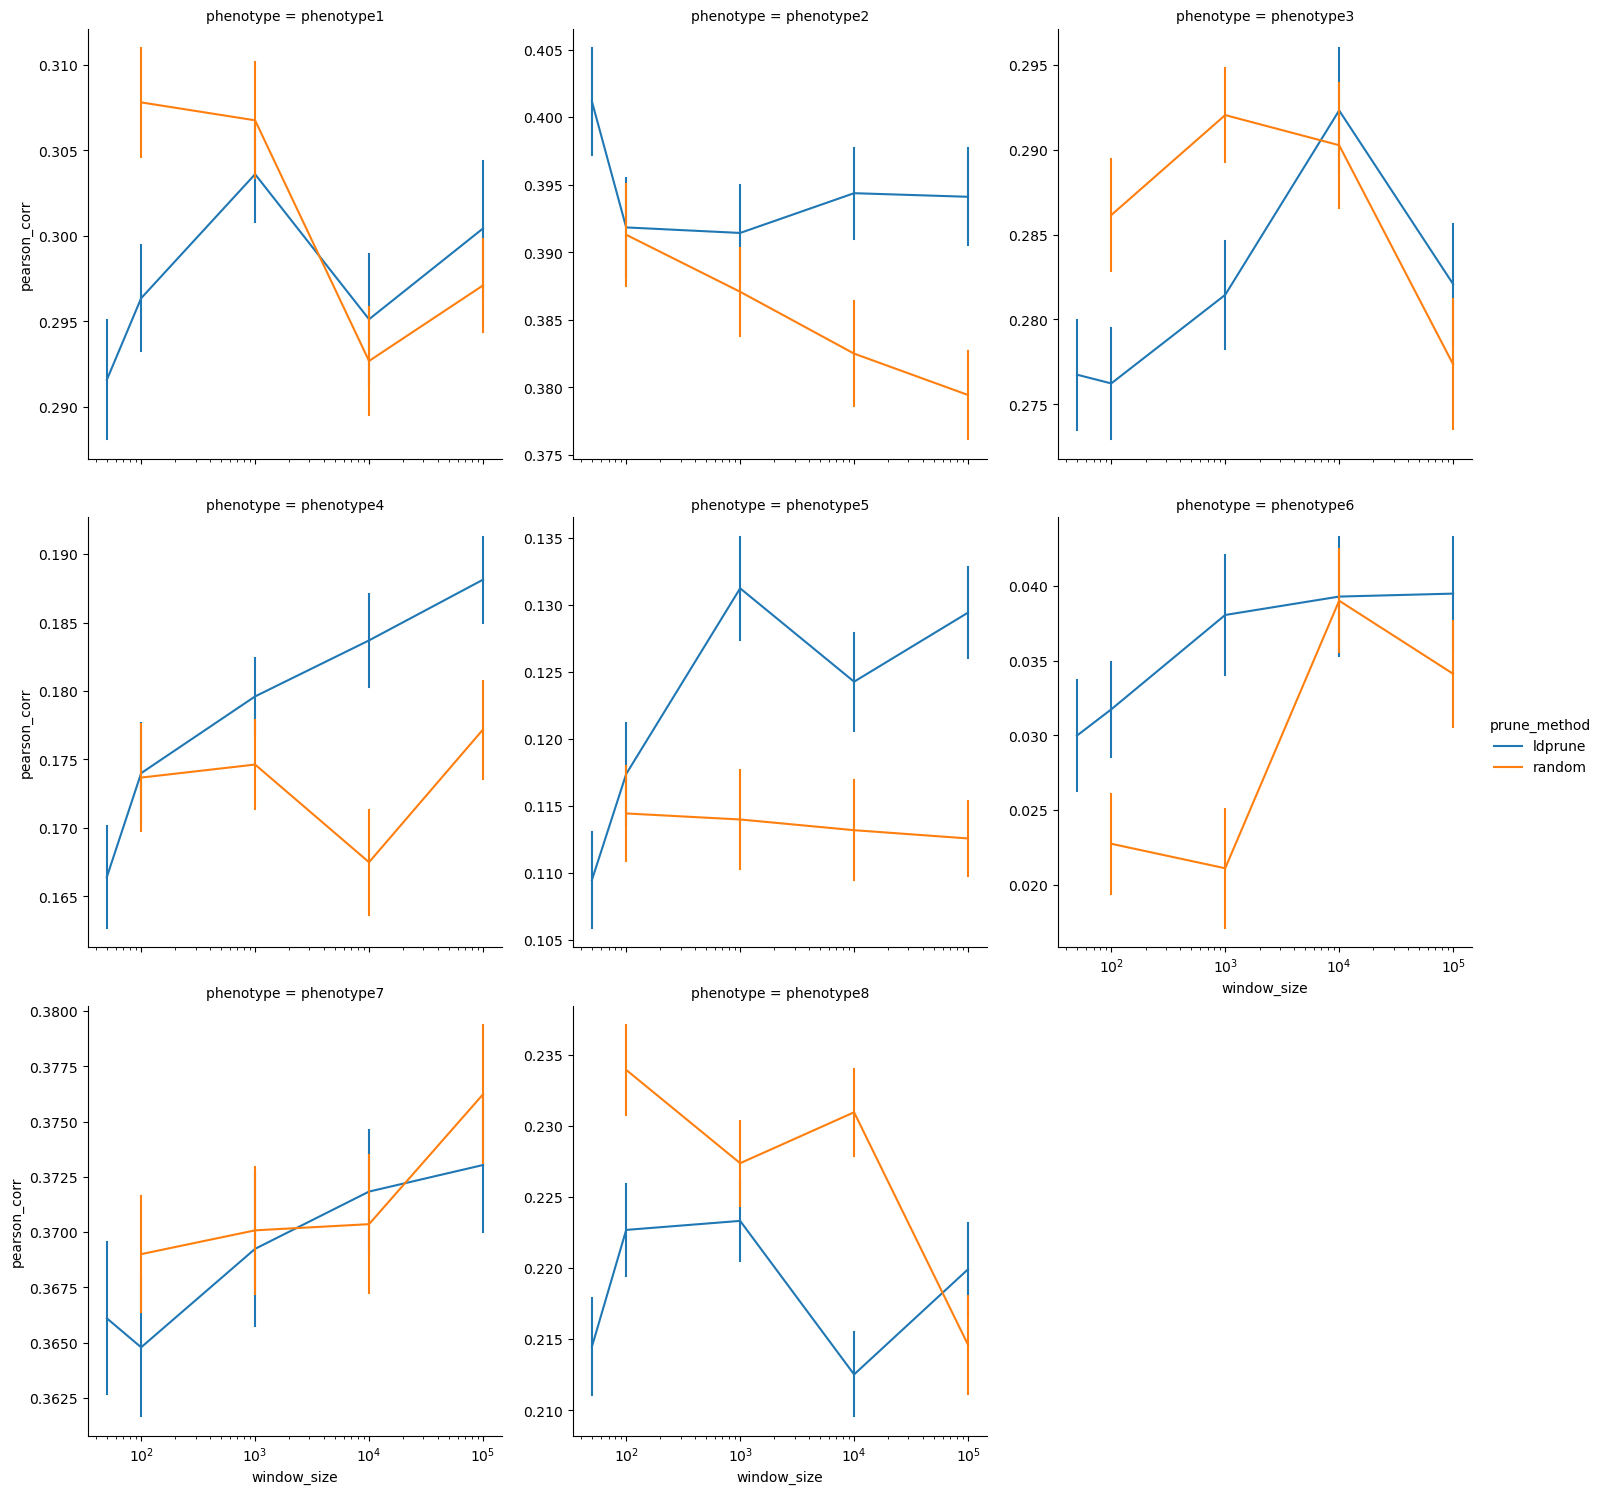

In [22]:
sns.relplot(data=df[(df.pairwise_r2 == 0.99)], kind='line', x="window_size", y="pearson_corr", hue="prune_method", col_wrap=3, col='phenotype', facet_kws={'sharey': False, 'sharex': True},  err_style="bars", errorbar="se", markers=False, dashes=False)
plt.xscale('log')

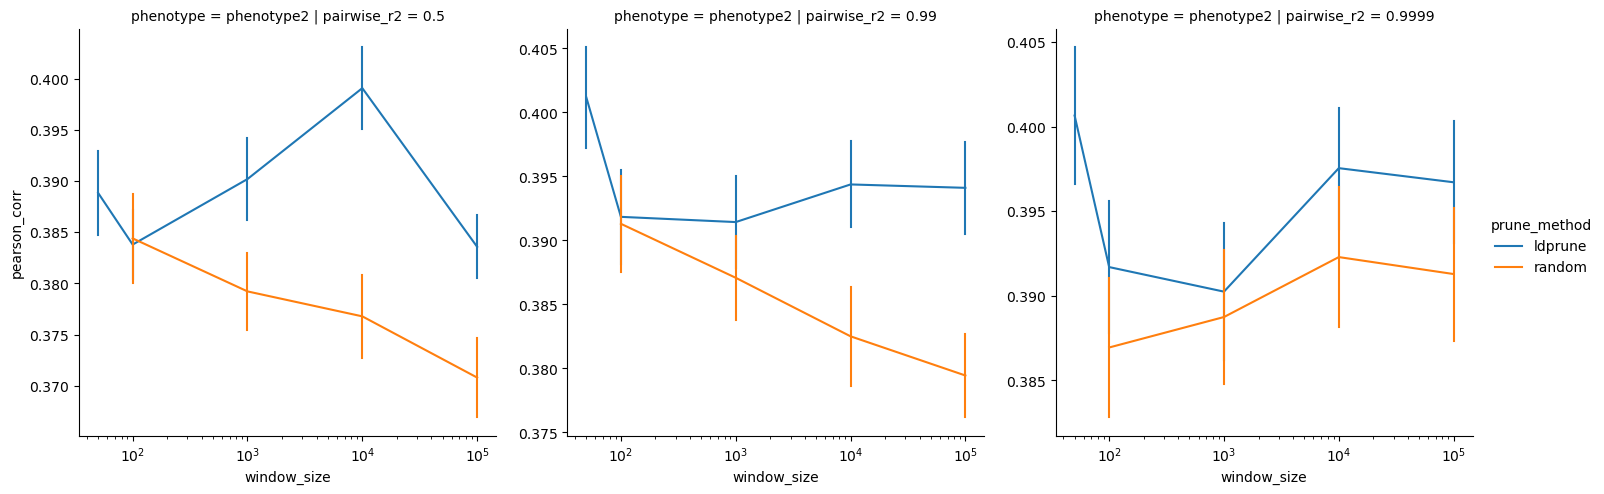

In [24]:
sns.relplot(data=df[df.phenotype == 'phenotype2'], kind='line', x="window_size", y="pearson_corr", hue='prune_method', col='pairwise_r2', row='phenotype', facet_kws={'sharey': False, 'sharex': True}, err_style="bars", errorbar="se", markers=False, dashes=False)
plt.xscale('log')
# vars: window_size, pearson_corr, pairwise_r2, phenotype, prume_method, num_snps

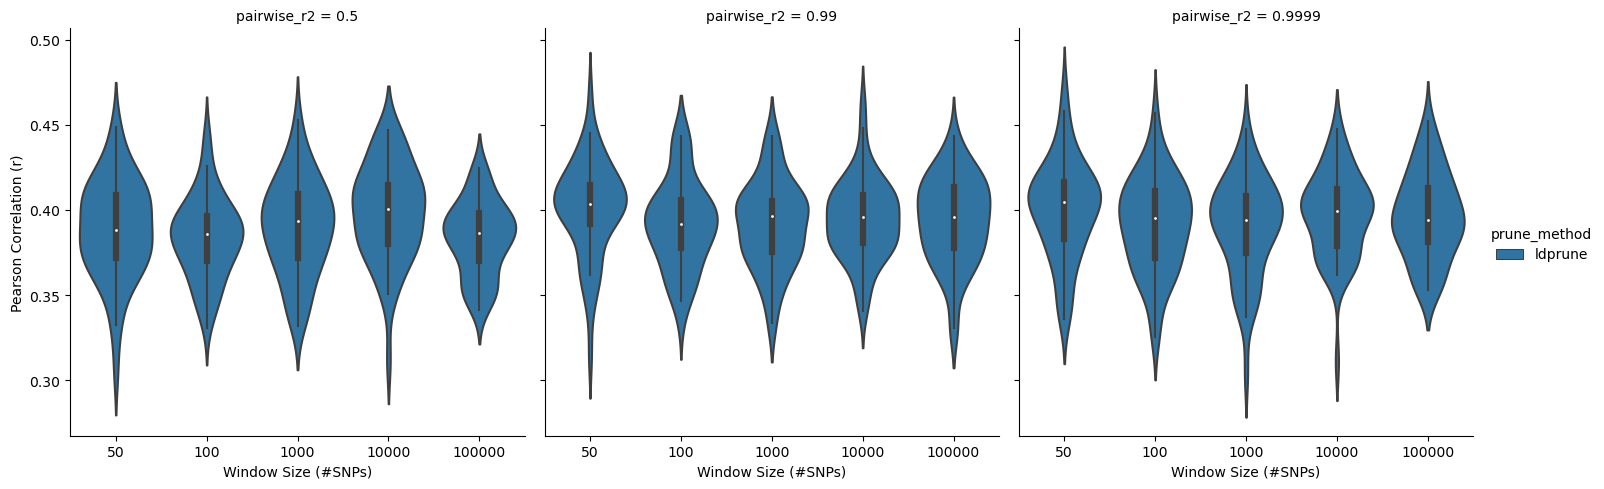

In [30]:
ax = sns.catplot(data=df[(df.phenotype == 'phenotype2')&(df.prune_method=='ldprune')], kind='violin', x="window_size", y="pearson_corr", hue='prune_method', col='pairwise_r2', facet_kws={'sharey': False, 'sharex': False}, alpha=0.5)
ax.set_axis_labels('Window Size (#SNPs)', "Pearson Correlation (r)")
ax

In [31]:
df[(df.phenotype == 'phenotype2')&(df.prune_method=='ldprune')].groupby(by=['pairwise_r2', 'window_size']).pearson_corr.mean()

pairwise_r2  window_size
0.5000       50             0.388839
             100            0.383793
             1000           0.390190
             10000          0.399065
             100000         0.383576
0.9900       50             0.401167
             100            0.391839
             1000           0.391430
             10000          0.394371
             100000         0.394106
0.9999       50             0.400651
             100            0.391694
             1000           0.390242
             10000          0.397542
             100000         0.396707
Name: pearson_corr, dtype: float64

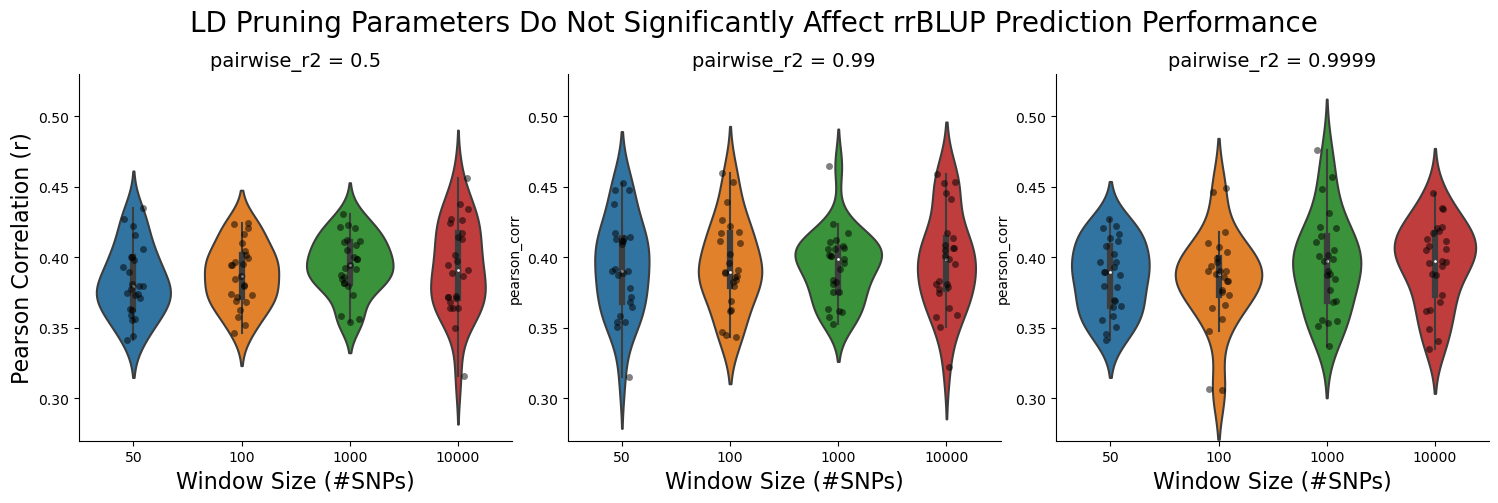

In [32]:
g = sns.catplot(data=indepld[indepld.phenotype=='phenotype2'], kind='violin', x="window_size", y="pearson_corr", col='pairwise_r2', facet_kws={'sharey': False, 'sharex': False}, sharey=False, alpha=0.5)
g.fig.suptitle('LD Pruning Parameters Do Not Significantly Affect rrBLUP Prediction Performance', fontsize=20)
g.fig.subplots_adjust(top=0.85)
g.set_axis_labels('Window Size (#SNPs)', "Pearson Correlation (r)", fontsize=16)

for i, ax in enumerate(g.axes.flat):
    r2 = ax.get_title().split('=')[1]
    ax.set_title(label=ax.get_title(), fontsize=14)

    category_data = indepld[(indepld['phenotype'] == 'phenotype2') & (indepld['pairwise_r2'] == float(r2))]    
    
    # Overlay stripplot on violinplot
    sns.stripplot(data=category_data, x='window_size', y='pearson_corr', dodge=True, alpha=0.5, jitter=True, ax=ax, legend=False, color='black')
    
    ymin, ymax = category_data['pearson_corr'].min(), category_data['pearson_corr'].max()
    ax.set_ylim(0.27, 0.53)

plt.show()

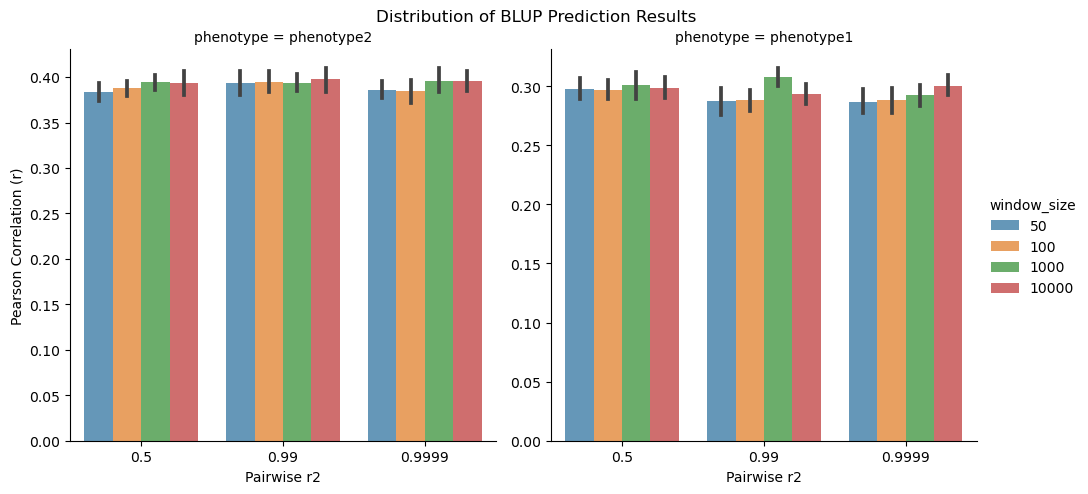

In [33]:
g = sns.catplot(data=indepld, kind='bar', x="pairwise_r2", hue= 'window_size', y="pearson_corr", col = 'phenotype', facet_kws={'sharey': False, 'sharex': False}, sharey=False, alpha=0.75)
g.fig.suptitle('Distribution of BLUP Prediction Results')
g.fig.subplots_adjust(top=0.90)
g.set_axis_labels('Pairwise r2', "Pearson Correlation (r)")

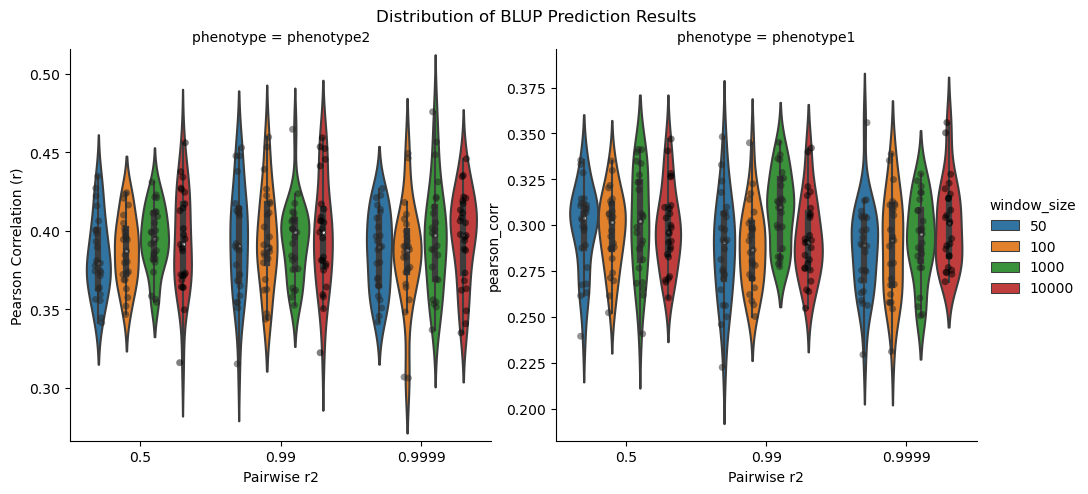

In [37]:
g = sns.catplot(data=indepld, kind='violin', x="pairwise_r2", hue= 'window_size', y="pearson_corr", col = 'phenotype', facet_kws={'sharey': False, 'sharex': False}, sharey=False, alpha=0.5)
g.fig.suptitle('Distribution of BLUP Prediction Results')
g.fig.subplots_adjust(top=0.9)
g.set_axis_labels('Pairwise r2', "Pearson Correlation (r)")

for i, ax in enumerate(g.axes.flat):
    phenotype = ax.get_title().split('=')[1]

    category_data = indepld[indepld['phenotype'] == phenotype.strip()]    
    
    # Overlay stripplot on violinplot
    sns.stripplot(data=category_data, x='pairwise_r2', y='pearson_corr', hue='window_size', dodge=True, alpha=0.5, jitter=True, ax=ax, legend=False, palette = 'dark:black')
    
    ymin, ymax = category_data['pearson_corr'].min(), category_data['pearson_corr'].max()
    ax.set_ylim(ymin-0.04, ymax+0.04)
    

In [38]:
indepld.groupby(by=['phenotype', 'pairwise_r2', 'window_size']).mean()

num_snps  pearson_corr
phenotype  pairwise_r2 window_size                         
phenotype1 0.5000      50           200795.84      0.297794
                       100          101526.08      0.297145
                       1000          12458.48      0.301104
                       10000          5430.00      0.298541
           0.9900      50           266000.32      0.287180
                       100          143175.24      0.288261
                       1000          37879.88      0.308179
                       10000         35870.60      0.293392
           0.9999      50           285058.12      0.286933
                       100          167968.64      0.288274
                       1000          84675.92      0.292511
                       10000         84557.60      0.300450
phenotype2 0.5000      50           211561.72      0.383312
                       100          106878.64      0.387564
                       1000          12034.28      0.394712
                       10000          4585.72      0.393059
           0.9900      50           279108.40      0.393732
                       100          149456.92      0.394992
                       1000          32668.64      0.393701
                       10000         29195.56      0.397446
           0.9999      50           289757.36      0.386299
                       100          164416.08      0.384390
                       1000          63244.68      0.396091
                       10000         62101.28      0.395620

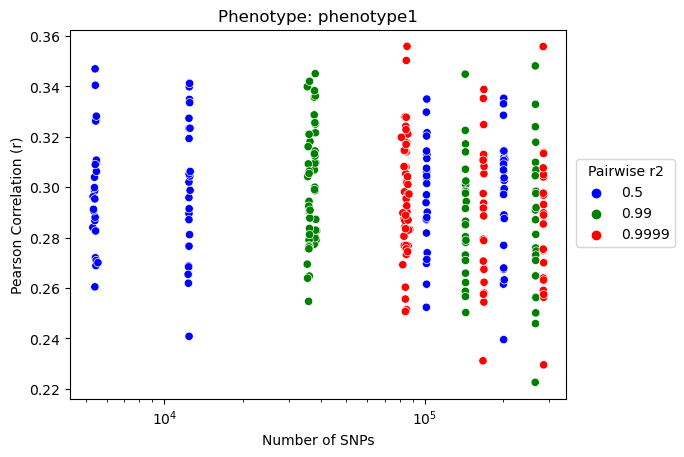

In [70]:
ax = sns.scatterplot(data=indepld[indepld.phenotype=='phenotype1'], x='num_snps', hue='pairwise_r2', y='pearson_corr', palette = ['blue', 'green', 'red'])
plt.xscale('log')
plt.ylabel('Pearson Correlation (r)')
plt.xlabel('Number of SNPs')
plt.title('Phenotype: phenotype1')
plt.legend(title='Pairwise r2', bbox_to_anchor=(1.02, 0.65), loc='upper left', borderaxespad=0)

In [41]:
indeptimes.groupby(by=['phenotype', 'pairwise_r2', 'window_size']).mean()

num_snps  overall_runtime  \
phenotype  pairwise_r2 window_size                               
phenotype1 0.5000      50           200795.84       134.502965   
                       100          101526.08        86.912771   
                       1000          12458.48        48.095339   
                       10000          5430.00        47.210331   
           0.9900      50           266000.32       167.569239   
                       100          143175.24       112.942143   
                       1000          37879.88        65.057846   
                       10000         35870.60        94.861949   
           0.9999      50           285058.12       196.231179   
                       100          167968.64       139.364022   
                       1000          84675.92        98.232282   
                       10000         84557.60       166.855701   
phenotype2 0.5000      50           211561.72       141.108616   
                       100          106878.64        91.343056   
                       1000          12034.28        47.711558   
                       10000          4585.72        46.557801   
           0.9900      50           279108.40       172.512780   
                       100          149456.92       110.431110   
                       1000          32668.64        57.793224   
                       10000         29195.56        81.743459   
           0.9999      50           289757.36       168.188760   
                       100          164416.08       108.136544   
                       1000          63244.68        73.392207   
                       10000         62101.28       121.409728   

                                    data_setup_runtime  model_runtime  
phenotype  pairwise_r2 window_size                                     
phenotype1 0.5000      50                    47.908852      86.593894  
                       100                   45.622937      41.289624  
                       1000                  41.259995       6.835126  
                       10000                 43.900203       3.309915  
           0.9900      50                    48.050319     119.518703  
                       100                   47.427937      65.513980  
                       1000                  47.520064      17.537554  
                       10000                 78.925639      15.936085  
           0.9999      50                    50.858031     145.372919  
                       100                   51.201872      88.161918  
                       1000                  55.890015      42.342033  
                       10000                128.927427      37.928042  
phenotype2 0.5000      50                    49.504428      91.603964  
                       100                   47.646561      43.696278  
                       1000                  41.639057       6.072289  
                       10000                 43.496976       3.060604  
           0.9900      50                    48.182188     124.330373  
                       100                   46.555248      63.875641  
                       1000                  44.126853      13.666156  
                       10000                 69.254308      12.488925  
           0.9999      50                    49.178357     119.010191  
                       100                   45.312519      62.823819  
                       1000                  48.202292      25.189705  
                       10000                 97.140007      24.269516

In [43]:
# ax = sns.relplot(data=df[(df.phenotype == 'phenotype2') & (df.pairwise_r2 == 0.99) & (df.window_size != 100) & (df.prune_method=='random')], kind='line', x="num_snps", y="pearson_corr", err_style="bars", errorbar="se", markers=False, dashes=False)
# ax.map_dataframe(sns.scatterplot, x='num_snps', y='pearson_corr', color='g', alpha=0.5)
# plt.title("pairwise_r2=0.99, phenotype=phenotype2, random")
# ax

## fully random data 
data from fully_random_gens.ipynb

In [45]:
rlog = pd.read_csv("../data/randomlogtest.csv")
rlog.head()

,num_snps,phenotype,pearson_corr
0,10,phenotype1,0.053849
1,10,phenotype2,-0.023852
2,10,phenotype1,-0.024123
3,10,phenotype8,0.040918
4,10,phenotype7,0.044580


In [46]:
rlog[rlog.num_snps >=10000].groupby(by=['phenotype', 'num_snps']).agg({'pearson_corr': ['mean', 'std']})

pearson_corr          
                            mean       std
phenotype  num_snps                       
phenotype1 10000        0.307785  0.025412
           50000        0.289957  0.029243
           100000       0.310585  0.028189
           300000       0.303039  0.025460
           1000000      0.296615  0.033307
phenotype2 10000        0.378293  0.025064
           50000        0.379899  0.028190
           100000       0.400338  0.025220
           300000       0.387674  0.026621
           1000000      0.393809  0.021289
phenotype3 10000        0.278503  0.012774
           50000        0.284478  0.022273
           100000       0.289896  0.023633
           300000       0.296001  0.017608
           1000000      0.290987  0.019489
phenotype4 10000        0.166228  0.025763
           50000        0.184437  0.020076
           100000       0.176574  0.015410
           300000       0.160051  0.021948
           1000000      0.166451  0.029264
phenotype5 10000        0.101896  0.017794
           50000        0.112694  0.027841
           100000       0.127189  0.026196
           300000       0.125102  0.024180
           1000000      0.114131  0.029625
phenotype6 10000        0.023948  0.023797
           50000        0.024019  0.029668
           100000       0.027344  0.023445
           300000       0.030825  0.019501
           1000000      0.029302  0.022167
phenotype7 10000        0.362279  0.021382
           50000        0.366120  0.007365
           100000       0.371388  0.028114
           300000       0.361060  0.018149
           1000000      0.370663  0.020512
phenotype8 10000        0.215345  0.027392
           50000        0.230766  0.016169
           100000       0.221964  0.022244
           300000       0.228218  0.037133
           1000000      0.222726  0.030357

In [24]:
rlog = pd.read_csv('../data/random10_1_times.csv')
rlog2 = pd.read_csv('../data/r10_1_1mil_times.csv')
rlog.rename(columns={'outsnps': 'num_snps', 'rprunert': 'pruning_runtime', 'Amatrt': 'GRM_runtime', 'predsrt': 'preds_runtime'}, inplace=True)
rlog2.rename(columns={'outsnps': 'num_snps', 'rprunert': 'pruning_runtime', 'Amatrt': 'GRM_runtime', 'predsrt': 'preds_runtime'}, inplace=True)

pd.concat([rlog, rlog2]).to_csv('../data/randomlog10_1_times.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: '../data/random10_1_times.csv'

In [47]:
rlog = pd.read_csv('../data/randomlogtest.csv')
rlog.head()

,num_snps,phenotype,pearson_corr
0,10,phenotype1,0.053849
1,10,phenotype2,-0.023852
2,10,phenotype1,-0.024123
3,10,phenotype8,0.040918
4,10,phenotype7,0.044580


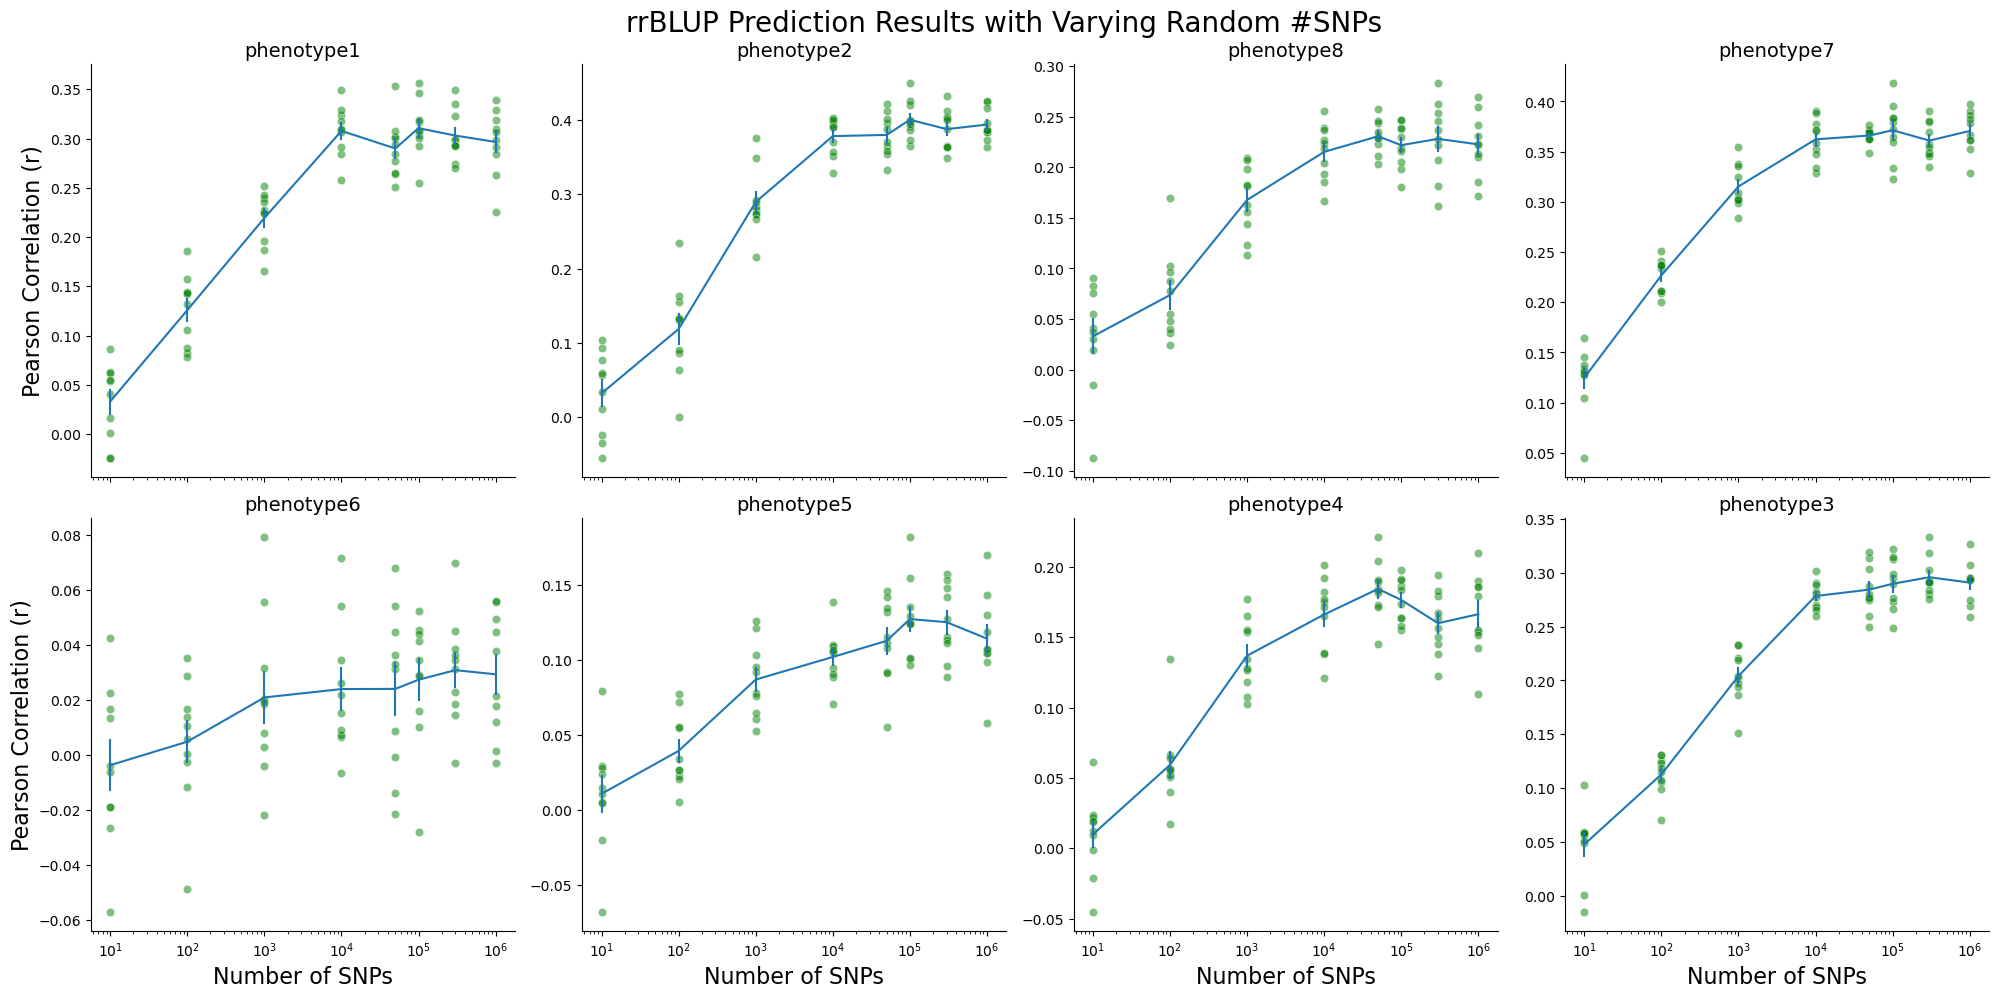

In [48]:
g = sns.relplot(data=rlog, x='num_snps', y='pearson_corr', kind='line', col='phenotype', err_style="bars", errorbar="se", markers=False, dashes=False, col_wrap=4, facet_kws={'sharey': False})

# Plot scatterplot for each category separately
def plot_scatter(x, y, color, **kwargs):
    data = kwargs.pop('data')
    category = data['phenotype'].unique()[0]
    category_data = data[data['phenotype'] == category]
    sns.scatterplot(data=category_data, x=x, y=y, color=color, **kwargs)
    
for i, ax in enumerate(g.axes.flat):
    category = ax.get_title().split(" = ")[1]
    ax.set_title(category, fontsize=14)

g.map(plot_scatter, 'num_snps', 'pearson_corr', color='green', alpha=0.5, data=rlog)
plt.xscale('log')
g.fig.subplots_adjust(top=0.925)
g.fig.suptitle('rrBLUP Prediction Results with Varying Random #SNPs', fontsize=20)
g.set_axis_labels(x_var="Number of SNPs", y_var="Pearson Correlation (r)", fontsize=16)
plt.show()

In [51]:
g = sns.relplot(data=rlog, x='num_snps', y='ratio', kind='line', col='phenotype', err_style="bars", errorbar="se", markers=False, dashes=False, col_wrap=4, facet_kws={'sharey': False})

# Plot scatterplot for each category separately
def plot_scatter(x, y, color, **kwargs):
    data = kwargs.pop('data')
    category = data['phenotype'].unique()[0]
    category_data = data[data['phenotype'] == category]
    sns.scatterplot(data=category_data, x=x, y=y, color=color, **kwargs)
    
for i, ax in enumerate(g.axes.flat):
    category = ax.get_title().split(" = ")[1]
    ax.set_title(category, fontsize=14)

g.map(plot_scatter, 'num_snps', 'ratio', color='green', alpha=0.5, data=rlog)
plt.xscale('log')
g.fig.subplots_adjust(top=0.925)
g.fig.suptitle('Distribution of Prediction Results | 10.1 Genotype | 1380 Train Rats ', fontsize=16)
g.set_axis_labels(x_var="Number of SNPs", y_var="r2 / h2 ratio", fontsize=16)
plt.show()

In [52]:
rlog.phenotype.unique()

array(['phenotype1', 'phenotype2', 'phenotype8', 'phenotype7',
       'phenotype6', 'phenotype5', 'phenotype4', 'phenotype3'],
      dtype=object)

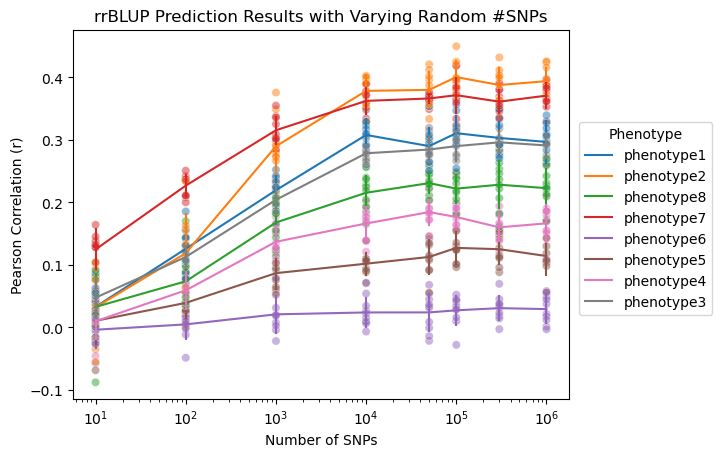

In [53]:
sns.lineplot(data=rlog, x='num_snps', y='pearson_corr', err_style="bars", errorbar="sd", markers=False, dashes=False, hue='phenotype')
sns.scatterplot(data=rlog, x='num_snps', y='pearson_corr', alpha=0.5, hue='phenotype', legend=False)
plt.xlabel('Number of SNPs')
plt.ylabel('Pearson Correlation (r)')
plt.title("rrBLUP Prediction Results with Varying Random #SNPs")
plt.legend(title='Phenotype', bbox_to_anchor=(1.02, 0.75), loc='upper left', borderaxespad=0)
plt.xscale('log')

In [56]:
rlog[rlog.phenotype=='phenotype7'].groupby('num_snps').mean()

,pearson_corr
num_snps,
10,0.124721
100,0.226762
1000,0.315334
10000,0.362279
50000,0.366120
100000,0.371388
300000,0.361060
1000000,0.370663


In [58]:
rlog.num_snps.unique()

array([     10,     100,    1000,   10000,   50000,  100000,  300000,
       1000000])

In [59]:
from scipy.stats import f_oneway
pvals = []
for phenotype in rlog.phenotype.unique():
    pdata = rlog[rlog.phenotype == phenotype]
    anova = f_oneway(pdata[pdata.num_snps == 10000].pearson_corr, pdata[pdata.num_snps == 50000].pearson_corr, pdata[pdata.num_snps == 100000].pearson_corr, pdata[pdata.num_snps == 300000].pearson_corr, pdata[pdata.num_snps == 1000000].pearson_corr)
    pvals.append(anova.pvalue)
pd.DataFrame({'phenotype': rlog.phenotype.unique(), 'pval': pvals}).sort_values(by='pval').reset_index(drop=True)

,phenotype,pval
0,phenotype4,0.151078
1,phenotype5,0.184529
2,phenotype2,0.268971
3,phenotype3,0.335156
4,phenotype1,0.490485
5,phenotype7,0.707409
6,phenotype8,0.755267
7,phenotype6,0.954275


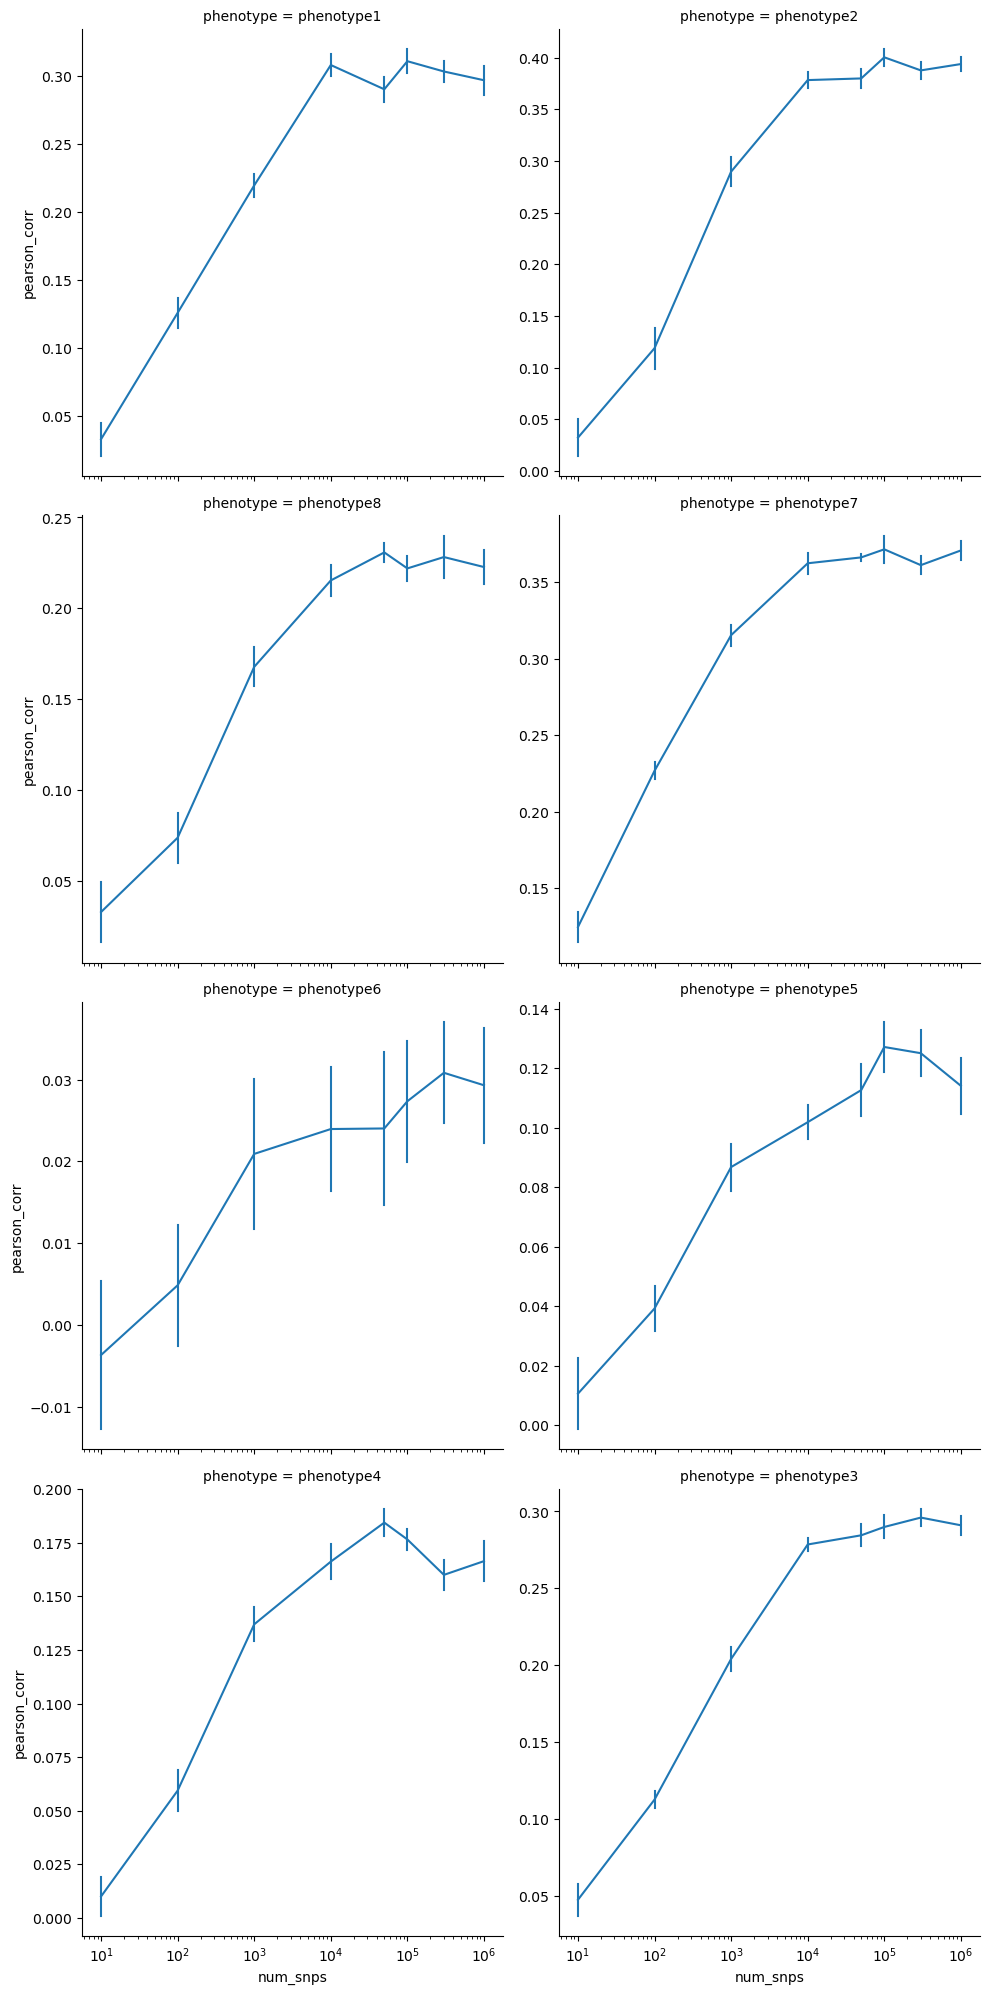

In [60]:
ax = sns.relplot(data=rlog, kind='line', x='num_snps', y='pearson_corr', col='phenotype', col_wrap=2, err_style="bars", errorbar="se", markers=False, dashes=False, facet_kws={'sharey': False, 'sharex': True})
plt.xscale('log')

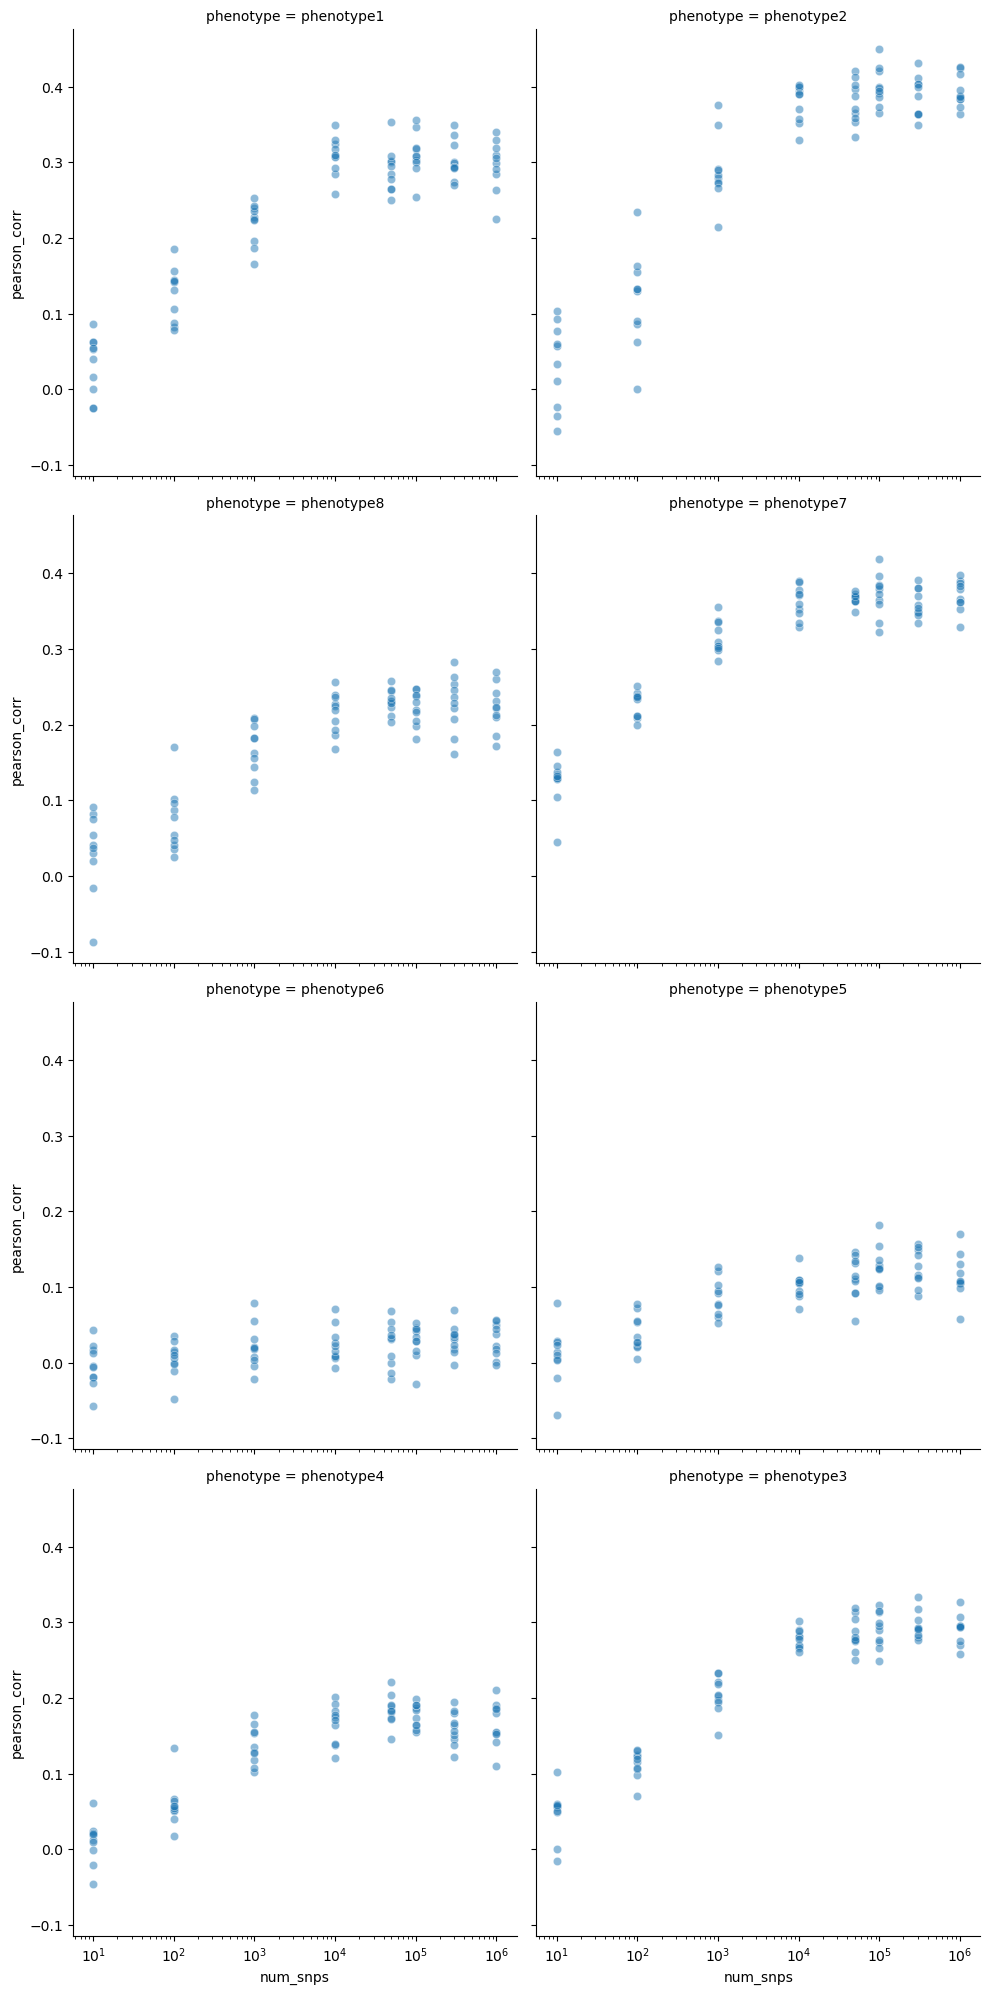

In [61]:
sns.relplot(data=rlog, x='num_snps', y='pearson_corr', col='phenotype', col_wrap=2, alpha=0.5)
plt.xscale('log')

In [62]:
ldcompare = ldprune[(ldprune.pairwise_r2 == 0.99) & (ldprune.window_size==1000)][['phenotype', 'pearson_corr', 'prune_method']].reset_index(drop=True)
ldcompare.head()

,phenotype,pearson_corr,prune_method
0,phenotype1,0.314857,ldprune
1,phenotype1,0.304547,ldprune
2,phenotype1,0.309709,ldprune
3,phenotype1,0.304593,ldprune
4,phenotype1,0.326791,ldprune


In [64]:
randomcompare = pd.read_csv('../data/old/randommatch50.csv')
randomcompare = randomcompare.rename(columns={'outphenos': 'phenotype', 'outrs': 'pearson_corr'})[['phenotype', 'pearson_corr']]
randomcompare['prune_method'] = 'random'
randomcompare.head()

,phenotype,pearson_corr,prune_method
0,phenotype1,0.328031,random
1,phenotype2,0.394695,random
2,phenotype3,0.289066,random
3,phenotype4,0.151093,random
4,phenotype5,0.151679,random


In [65]:
comparedf = pd.concat([ldcompare, randomcompare])
comparedf.prune_method.value_counts()

ldprune    400
random     400
Name: prune_method, dtype: int64

In [66]:
comparedf.phenotype.unique()

array(['phenotype1', 'phenotype2', 'phenotype3', 'phenotype4',
       'phenotype5', 'phenotype6', 'phenotype7', 'phenotype8'],
      dtype=object)

## direct comparison between ldpruned (r2=0.99, window size=1000) and random (nsnps=42776) n=50

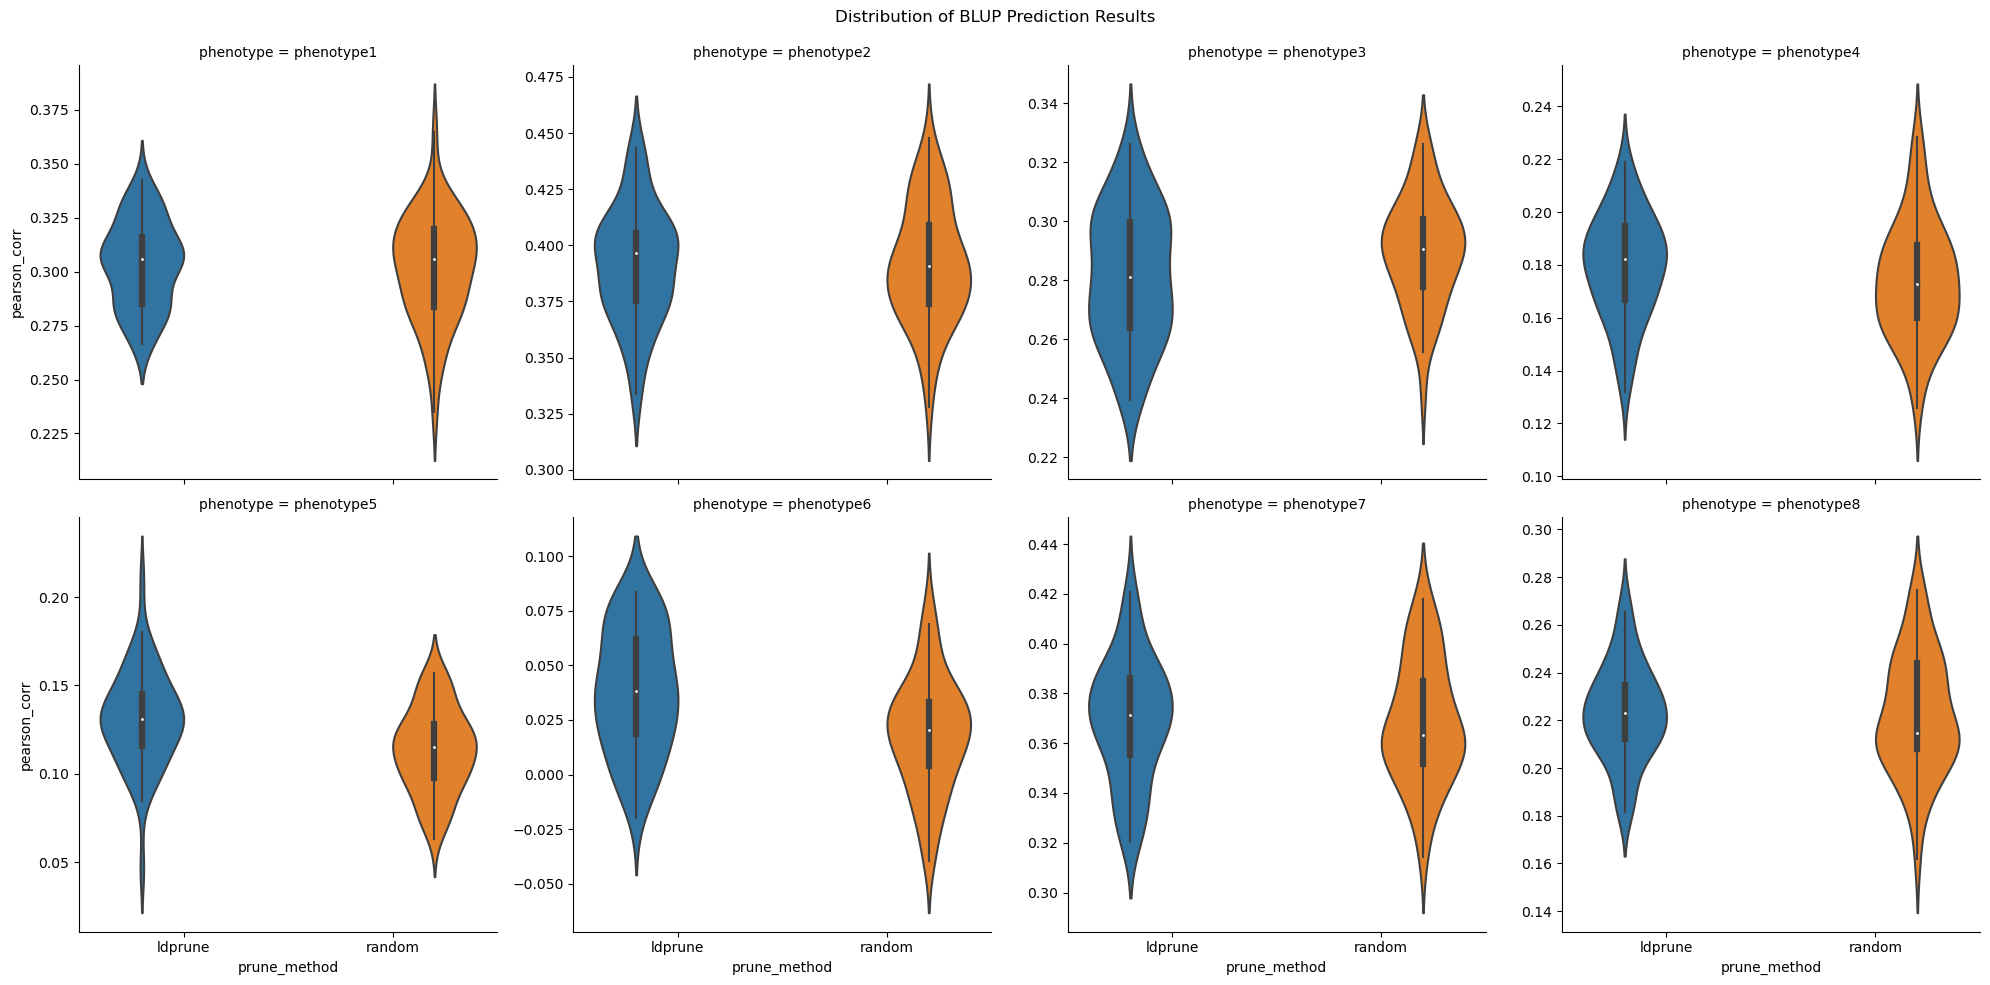

In [67]:
ax = sns.catplot(data=comparedf, kind='violin', x='prune_method', y="pearson_corr", col='phenotype', hue='prune_method', sharey=False, col_wrap=4)
ax.fig.subplots_adjust(top=0.925) # adjust the Figure in rp
ax.fig.suptitle('Distribution of BLUP Prediction Results')
plt.show()

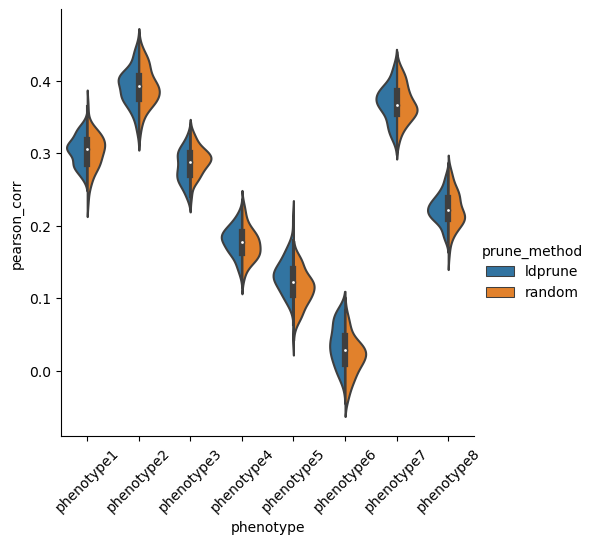

In [68]:
ax = sns.catplot(data=comparedf, kind='violin', x='phenotype', y="pearson_corr", hue='prune_method', split=True)
plt.xticks(rotation=45)
plt.show()

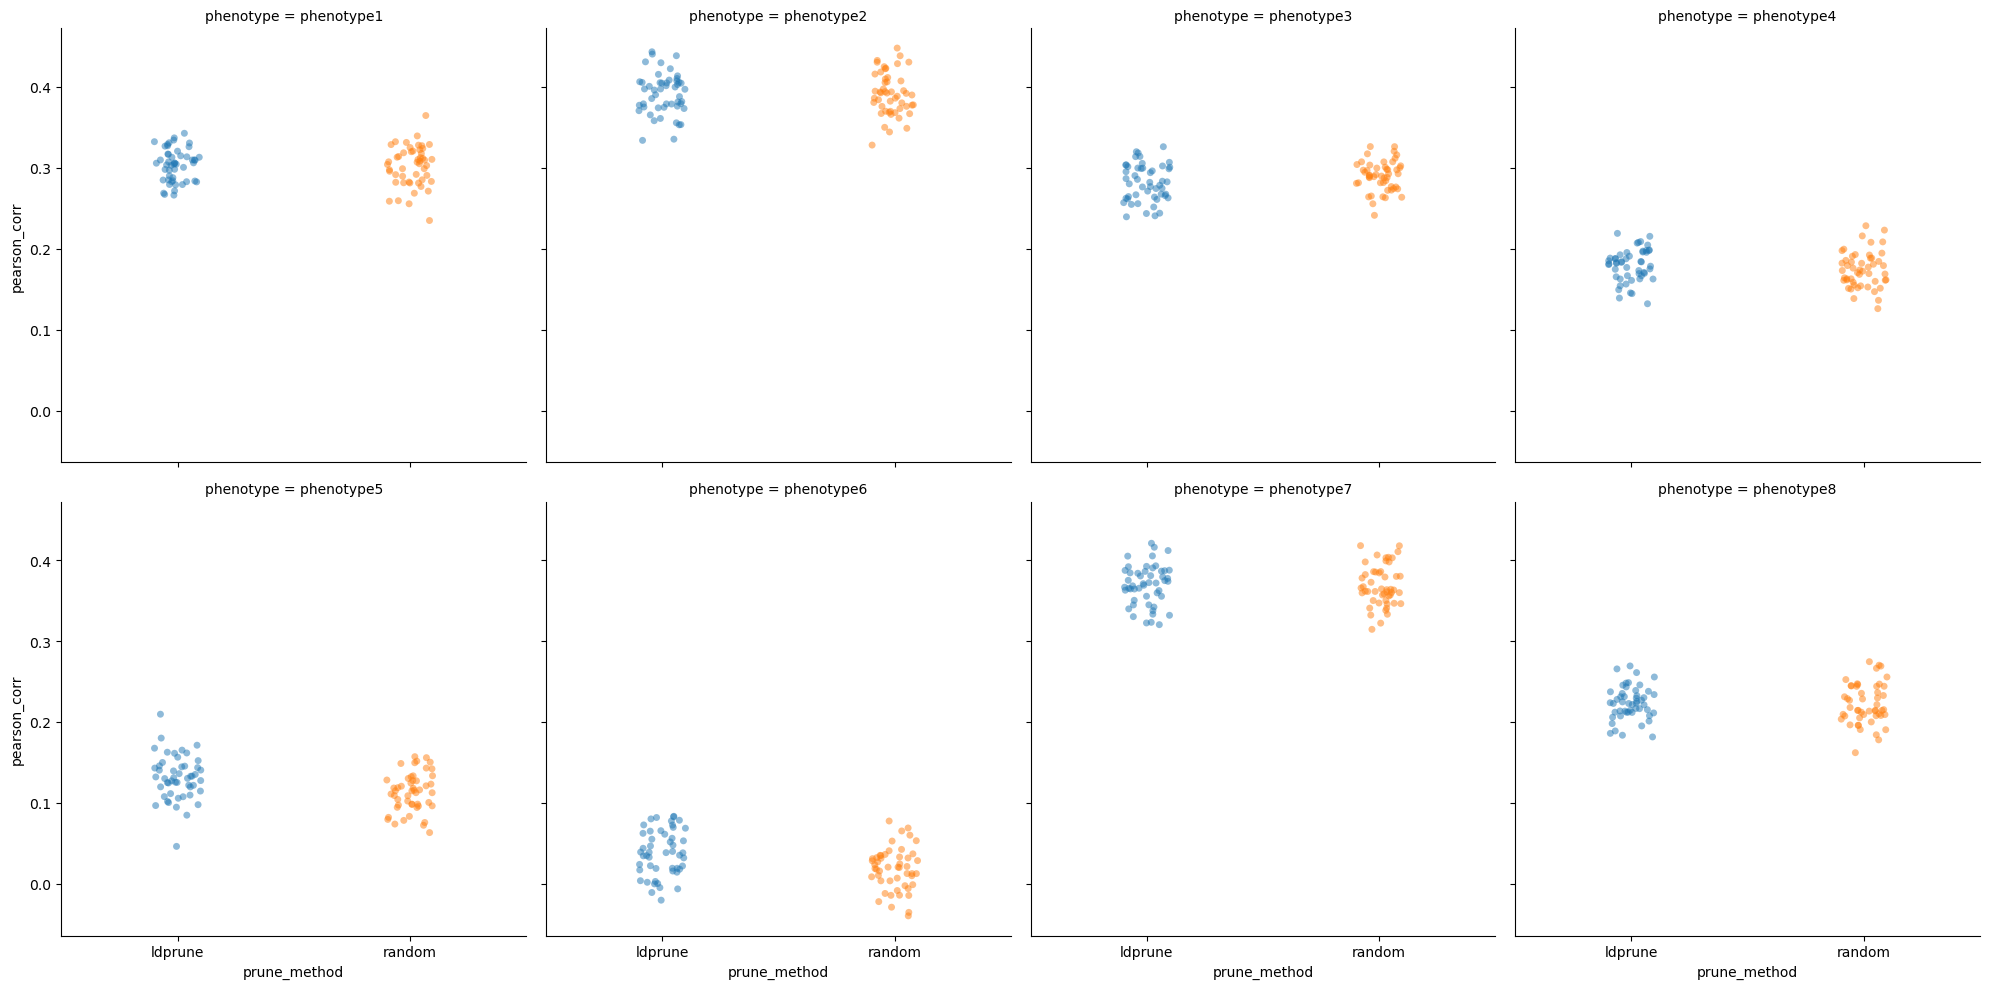

In [69]:
sns.catplot(data=comparedf, kind='strip', x='prune_method', y="pearson_corr", col='phenotype', hue='prune_method', col_wrap=4, alpha=0.5)
plt.show()